<a href="https://colab.research.google.com/github/RohitBShelar/Ineuron-Assignments/blob/main/Copy_of_Python_For_Data_Science_Rohit_Shelar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RFM Analysis and Customer Segmentation Using Online Retail sales dataset**

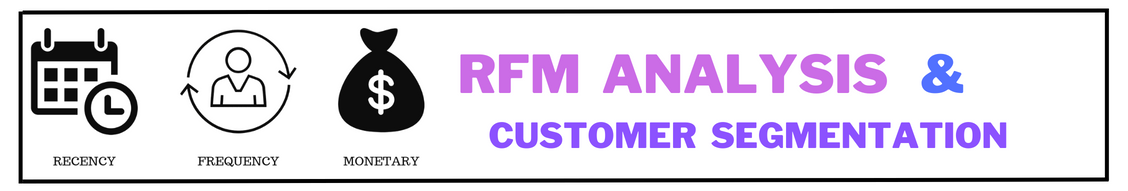

RFM analysis refers to a method that utilizes customer behavior data, specifically their recency, frequency, and monetary value, to forecast their future actions. To construct an RFM model, three crucial elements are taken into account:


1.   the customer's most recent transaction with the brand, **Recency**
2.   the frequency of their engagement with the brand, **Frequency**
3.   the total amount of money they have spent on the brand's goods or services, **Monetary**

The given dataset is transnational in nature and encompasses all the transactions that took place between 01/12/2010 and 09/12/2011, for a UK-based and registered online retailer that operates without a physical store. The primary products sold by the company are exceptional all-occasion gifts, and a significant portion of its customer base comprises wholesalers.

**Importing the requisite libraries**

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Mounting drive to notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Reading the dataset uploaded to the drive:**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Online Retail.csv')
data.head()

,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country
0,536365,01-12-2010,08:26:00 AM,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom
1,536365,01-12-2010,08:26:00 AM,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom
2,536365,01-12-2010,08:26:00 AM,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom
3,536365,01-12-2010,08:26:00 AM,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom
4,536365,01-12-2010,08:26:00 AM,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom


**Exploratory Data Analysis**

Check for the data size,number of records

In [ ]:
data.shape

(541909, 10)

Checking the data types of the columns

In [ ]:
data.dtypes

InvoiceNo       object
InvoiceDate     object
InvoiceTime     object
StockCode       object
Description     object
Quantity         int64
UnitPrice      float64
Totalsale      float64
CustomerID     float64
Country         object
dtype: object

Changing the data type of date and time column to requisite type

In [ ]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'],infer_datetime_format=True)
data.head()

In [ ]:
data.dtypes

InvoiceNo              object
InvoiceDate    datetime64[ns]
InvoiceTime            object
StockCode              object
Description            object
Quantity                int64
UnitPrice             float64
Totalsale             float64
CustomerID            float64
Country                object
dtype: object

In [ ]:
data.info

<bound method DataFrame.info of        InvoiceNo InvoiceDate  InvoiceTime StockCode  \
0         536365  2010-01-12  08:26:00 AM    85123A   
1         536365  2010-01-12  08:26:00 AM     71053   
2         536365  2010-01-12  08:26:00 AM    84406B   
3         536365  2010-01-12  08:26:00 AM    84029G   
4         536365  2010-01-12  08:26:00 AM    84029E   
...          ...         ...          ...       ...   
541904    581587  2011-09-12  12:50:00 PM     22613   
541905    581587  2011-09-12  12:50:00 PM     22899   
541906    581587  2011-09-12  12:50:00 PM     23254   
541907    581587  2011-09-12  12:50:00 PM     23255   
541908    581587  2011-09-12  12:50:00 PM     22138   

                                Description  Quantity  UnitPrice  Totalsale  \
0        WHITE HANGING HEART T-LIGHT HOLDER         6       2.55      15.30   
1                       WHITE METAL LANTERN         6       3.39      20.34   
2            CREAM CUPID HEARTS COAT HANGER         8       2.75      

Checking for missing values

In [ ]:
data.isnull().sum()

InvoiceNo           0
InvoiceDate         0
InvoiceTime         0
StockCode           0
Description      1454
Quantity            0
UnitPrice           0
Totalsale           0
CustomerID     135080
Country             0
dtype: int64

Filtering negative values

In [ ]:
data=data[data['Quantity']>0]

Removing rows with null customer ids

In [ ]:
data=data.dropna()

In [ ]:
#CrossCheck
data.isnull().sum()

InvoiceNo      0
InvoiceDate    0
InvoiceTime    0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Totalsale      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
data.head()

,InvoiceNo,InvoiceDate,InvoiceTime,StockCode,Description,Quantity,UnitPrice,Totalsale,CustomerID,Country
0,536365,2010-01-12,08:26:00 AM,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom
1,536365,2010-01-12,08:26:00 AM,71053,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom
2,536365,2010-01-12,08:26:00 AM,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom
3,536365,2010-01-12,08:26:00 AM,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom
4,536365,2010-01-12,08:26:00 AM,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom


# **Modelling Recency(R), Frequency(F), Monetary(M)**

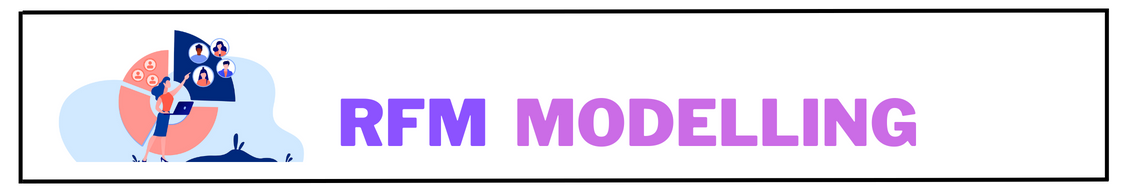

Recency(R) = Today's/Analysis Date - Latest Inovice Date

Frequency(F) = Count of invoice numbers .i.e. no. of transaction(s) for each customer, 

Monetary(M) = Total sales amount for each customer

**Setting Analysis or Today's date to 2011-12-10 as last invoice date was 2011-12-09.**

In [ ]:
import datetime as dt

Analysis_Date = dt.datetime(2011,12,10)

Calculating RFM values and storing them in a new dataframe,RFM

In [ ]:
RFM = data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (Analysis_Date - date.max()).days, 'InvoiceNo': lambda i: i.count(), 'Totalsale': lambda x: x.sum()})


In [ ]:
RFM.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Totalsale': 'Monetary'}, inplace=True)

RFM.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,40,182,4310.00
2,12348.0,76,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,311,17,334.40


**Recency-Descriptive Statistics**

In [ ]:
RFM.Recency.describe()

count    4339.000000
mean      105.461858
std       115.083263
min         0.000000
25%        22.000000
50%        61.000000
75%       161.500000
max       697.000000
Name: Recency, dtype: float64

Plotting Distribution for Recency

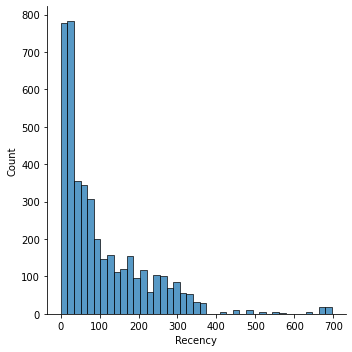

In [ ]:
import seaborn as sns

data_values = RFM['Recency']
plot = sns.displot(data_values)

**Frequency-Descriptive Statistics**

In [ ]:
RFM.Frequency.describe()

count    4339.000000
mean       91.708689
std       228.792852
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64

Plotting Distribution for Frequency

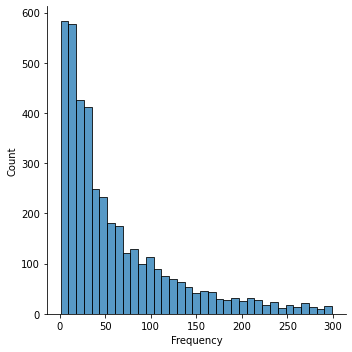

In [ ]:
data_values = RFM.query('Frequency < 300')['Frequency']
# Trimming frequencies beyond 300 as values beyond them seems insignificant for the purpose
plot = sns.displot(data_values)

**Monetary-Descriptive Statistics**

In [ ]:
RFM.Monetary.describe()

count      4339.000000
mean       2053.793017
std        8988.248381
min           0.000000
25%         307.245000
50%         674.450000
75%        1661.640000
max      280206.020000
Name: Monetary, dtype: float64

Plotting Distribution for Monetary

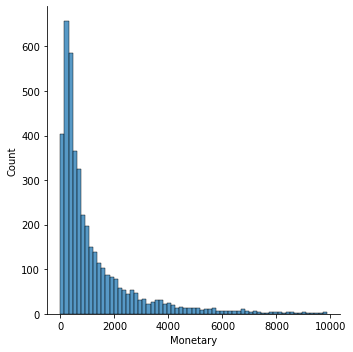

In [ ]:
data_values = RFM.query('Monetary < 10000')['Monetary']
# Trimming sales beyond 10000 as values beyond them seems insignificant for the purpose

plot = sns.displot(data_values)

**Splitting the RFM values into four segments using quantiles**

In [ ]:
quantiles = RFM.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,22.0,17.0,307.245
0.50,61.0,41.0,674.450
0.75,161.5,100.0,1661.640


Converting the quantile dataframe to dictionary to help extract quantiles values for recency,frequency and monetary respectively for further usage

In [ ]:
quantiles_dict=quantiles.to_dict()
quantiles_dict

{'Recency': {0.25: 22.0, 0.5: 61.0, 0.75: 161.5},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.24499999999995,
  0.5: 674.4499999999998,
  0.75: 1661.6399999999999}}

**Creating Functions to segment Recency, Frequency and Monetary values according to quantiles**

We give them a score or rank in accordance with their usefulness to business.

Score/Rank 1 represents the best useful enagagement with the business , while

Score/Rank 4 represents the least useful enagagement with the business .

In [ ]:
def RecencyScores(Recency_value):
    if Recency_value <= quantiles_dict['Recency'][0.25]:
        return 1
    elif Recency_value <= quantiles_dict['Recency'][0.50]:
        return 2
    elif Recency_value <= quantiles_dict['Recency'][0.75]: 
        return 3
    else:
        return 4
    
def FrequencyScores(Frequency_value):
    if Frequency_value <= quantiles_dict['Frequency'][0.25]:
        return 4
    elif Frequency_value <= quantiles_dict['Frequency'][0.50]:
        return 3
    elif Frequency_value <= quantiles_dict['Frequency'][0.75]: 
        return 2
    else:
        return 1
def MonetaryScores(Monetary_value):
    if Monetary_value <= quantiles_dict['Monetary'][0.25]:
        return 4
    elif Monetary_value <= quantiles_dict['Monetary'][0.50]:
        return 3
    elif Monetary_value <= quantiles_dict['Monetary'][0.75]: 
        return 2
    else:
        return 1

Pandas.apply() allow the users to pass a function and apply it on every single value of the Pandas series.

In [ ]:
#Calculating R, F and M segment scores for each customer
RFM['R'] = RFM['Recency'].apply(RecencyScores)
RFM['F'] = RFM['Frequency'].apply(FrequencyScores)
RFM['M'] = RFM['Monetary'].apply(MonetaryScores)
RFM.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.60,4,4,1
12347.0,40,182,4310.00,2,1,1
12348.0,76,31,1797.24,3,3,1
12349.0,19,73,1757.55,1,2,1
12350.0,311,17,334.40,4,4,3


Combining individual R,F and M scores to get an aggregate score for final comparison

In [ ]:
RFM['RFM_Combine']=RFM['R']+RFM['F']+RFM['M']
RFM.head(10)

,Recency,Frequency,Monetary,R,F,M,RFM_Combine
CustomerID,,,,,,,
12346.0,326,1,77183.60,4,4,1,9
12347.0,40,182,4310.00,2,1,1,4
12348.0,76,31,1797.24,3,3,1,7
12349.0,19,73,1757.55,1,2,1,4
12350.0,311,17,334.40,4,4,3,11
12352.0,73,85,2506.04,3,2,1,6
12353.0,205,4,89.00,4,4,4,12
12354.0,233,58,1079.40,4,2,2,8
12355.0,96,13,459.40,3,4,3,10


**Assigning loyalty level to each customer using their RFM combine score**

Quantile cut, qcut()  is a way of dividing a dataset into bins or categories based on the values of the data. It involves dividing the data into equal-sized groups based on the percentiles of the data.

The resulting bins created by the quantile cut are help us summarizing the data to visualize and analyze.

In [ ]:
Loyalty_labels=['Gold','Silver','Bronze']

#Using quantile cut function to convert the RFM combine score into buckets/bins
RFM['Loyalty_Level']=pd.qcut(RFM.RFM_Combine,q=3,labels=Loyalty_labels)
RFM.head(10)

,Recency,Frequency,Monetary,R,F,M,RFM_Combine,Loyalty_Level
CustomerID,,,,,,,,
12346.0,326,1,77183.60,4,4,1,9,Silver
12347.0,40,182,4310.00,2,1,1,4,Gold
12348.0,76,31,1797.24,3,3,1,7,Silver
12349.0,19,73,1757.55,1,2,1,4,Gold
12350.0,311,17,334.40,4,4,3,11,Bronze
12352.0,73,85,2506.04,3,2,1,6,Gold
12353.0,205,4,89.00,4,4,4,12,Bronze
12354.0,233,58,1079.40,4,2,2,8,Silver
12355.0,96,13,459.40,3,4,3,10,Bronze


**Overview of Loyalty Distribution**

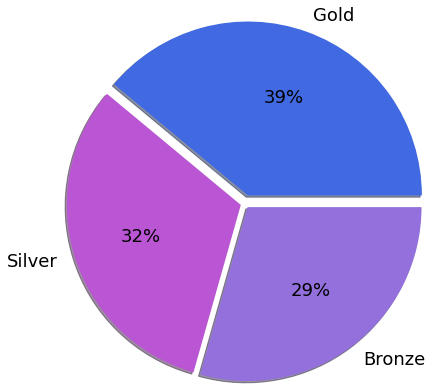

In [ ]:
#explode gives us exploded or separated view of each sector/slice
explode_values = [0.1, 0.05, 0.05] #these values sets the distance of each sector from the center

plt.pie(RFM.Loyalty_Level.value_counts(),
        labels=RFM.Loyalty_Level.value_counts().index,
        autopct='%.0f%%',textprops={'fontsize': 18},radius=2,shadow=True, explode = explode_values,colors=['royalblue','mediumorchid','mediumpurple'])
plt.show()

**Sample Analysis using the loyalty labels:**

Q-Find the list of all the Gold customers in order to send them special offers?

In [ ]:
RFM.query("Loyalty_Level=='Gold'")['Loyalty_Level']

CustomerID
12347.0    Gold
12349.0    Gold
12352.0    Gold
12356.0    Gold
12357.0    Gold
           ... 
18260.0    Gold
18263.0    Gold
18272.0    Gold
18283.0    Gold
18287.0    Gold
Name: Loyalty_Level, Length: 1691, dtype: category
Categories (3, object): ['Gold' < 'Silver' < 'Bronze']

# **Customer Segmentation using K-Means Clustering Algorithm**

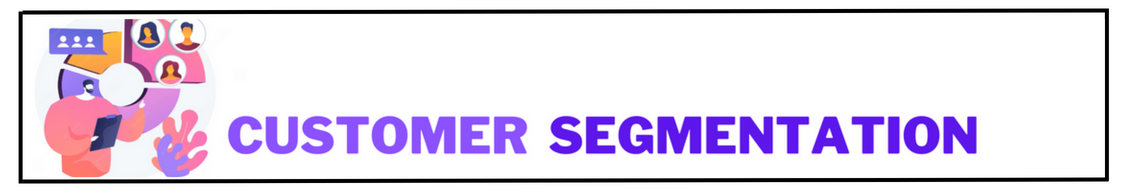

The practice of customer segmentation involves categorizing a customer base into separate clusters consisting of individuals who share common traits. By doing so, it becomes simpler to concentrate on particular groups of customers and offer customized products, services, and promotional campaigns that cater to their unique needs and preferences.


**K-means clustering** is a machine learning algorithm that partitions a dataset into k clusters based on their similarity. It works by iteratively assigning data points to the nearest cluster centroid and updating the centroid until convergence.

**Handling negative and zero values so that there's no error during log transformation**

In [ ]:
def handle_negatives_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_negatives_zero function to Recency and Monetary columns 
RFM['Recency'] = [handle_negatives_zero(x) for x in RFM.Recency]
RFM['Monetary'] = [handle_negatives_zero(x) for x in RFM.Monetary]

**Performing Log transformation to bring data into normal or near normal distribution**

The purpose of using the log transformation is to convert skewed data(as is evident from our respective distribution plots above,most of our data is distributed towards the origin) into a distribution that is roughly similar to a normal distribution.

Normalizing data is an important step in machine learning because it helps to ensure that all features(here R,F,M) in a dataset are on the same scale, which helps improve the performance, stability, accuracy,convergence and avoids bias of algorithms.

In [ ]:
Log_RFM= RFM[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)
Log_RFM.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,5.787,0.000,11.254
12347.0,3.689,5.204,8.369
12348.0,4.331,3.434,7.494
12349.0,2.944,4.290,7.472
12350.0,5.740,2.833,5.812


**Data distribution after data normalization for Recency**

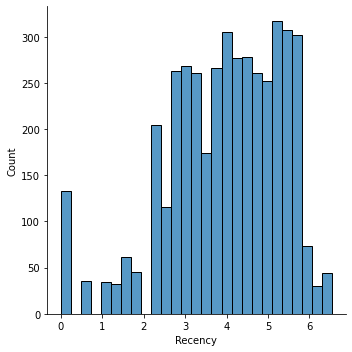

In [ ]:
Recency_data = Log_RFM['Recency']
recency_plot = sns.displot(Recency_data)

**Data distribution after data normalization for Frequency**

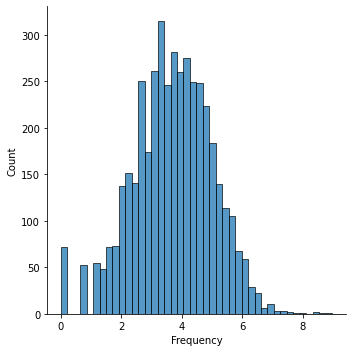

In [ ]:
Frequency_data = Log_RFM.query('Frequency < 1000')['Frequency']
frequency_plot = sns.displot(Frequency_data)

**Data distribution after data normalization for Monetary**

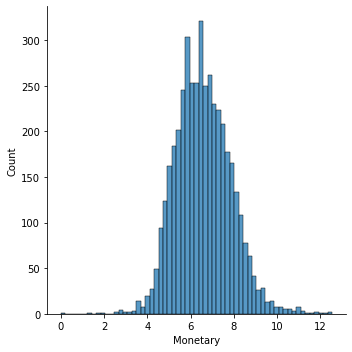

In [ ]:
Monetary_data = Log_RFM.query('Monetary < 10000')['Monetary']
monetary_plot = sns.displot(Monetary_data)

**Standardising and scaling data:**
When dealing with various machine learning algorithms, it is advisable to carry out data scaling as a preliminary processing measure. This involves either normalizing or standardizing input and output variables that are based on real numbers. Implementing standardization and normalization can significantly enhance the accuracy and effectiveness of predictive modeling algorithms

In [ ]:
from sklearn.preprocessing import StandardScaler

#Bringing the data to the same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_RFM)

#Transformimg it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFM.index, columns = Log_RFM.columns)

**Finding optimal k value using elbow method**

The Elbow method involves manipulating the number of clusters (K) from 1 to say 10 and calculating the Within-Cluster Sum of Square (WCSS) for each K value. WCSS is determined by adding up the squared distances between each point and the centroid in a cluster. The WCSS plot, which is shaped like an elbow, is created by graphing the WCSS values against the corresponding K values. As the number of clusters increases, the WCSS value decreases, with the largest value being when K equals 1. When we examine the plot, we can see that there is a significant change in slope at one point, resulting in an elbow shape. After that point, the graph follows a relatively parallel path to the X-axis. The optimal number of clusters or the optimal K value is the one corresponding to that elbow point.

**From Python's scikit-learn library, the *KMeans* class is imported from the sklearn.cluster module to perform k-means clustering**

In [ ]:
from sklearn.cluster import KMeans

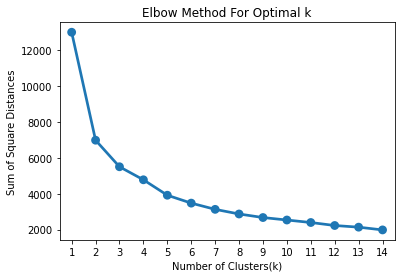

In [ ]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++',n_init='auto', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**K-Means Clustering model**

We first create a KMeans object with the desired number of clusters (n_clusters) and then fit the model to the data(here we use the transformed scaled data) using the fit method. 

The parameters *max_iter* and *init* control the k-means clustering algorithm. *iter* sets the maximum number of iterations, while *init* specifies the method for initializing cluster centroids. The default values are 300 iterations and k-means++ initialization, which spaces out centroids for better results. Other options include random initialization and custom initialization using a numpy array.

In [ ]:
KMean_cluster = KMeans(n_clusters= 3, init= 'k-means++', n_init='auto',max_iter= 1000)
KMean_cluster.fit(Scaled_Data)

KMeans(max_iter=1000, n_clusters=3, n_init='auto')

**Finding the clusters and labelling them**

 We get the labels for each data point using the *labels_* attribute

In [ ]:
RFM['Cluster'] = KMean_cluster.labels_
RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Combine,Loyalty_Level,Cluster
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,4,4,1,9,Silver,1
12347.0,40,182,4310.00,2,1,1,4,Gold,2
12348.0,76,31,1797.24,3,3,1,7,Silver,1
12349.0,19,73,1757.55,1,2,1,4,Gold,2
12350.0,311,17,334.40,4,4,3,11,Bronze,0


**Importing libraries to plot**

In [ ]:
from matplotlib import pyplot as plt

**Plotting Segmentation graph**

Scatter Plot:**Frequency Vs Recency**

We map colors to the segmented data points to highlight the clusters in the scatter plot

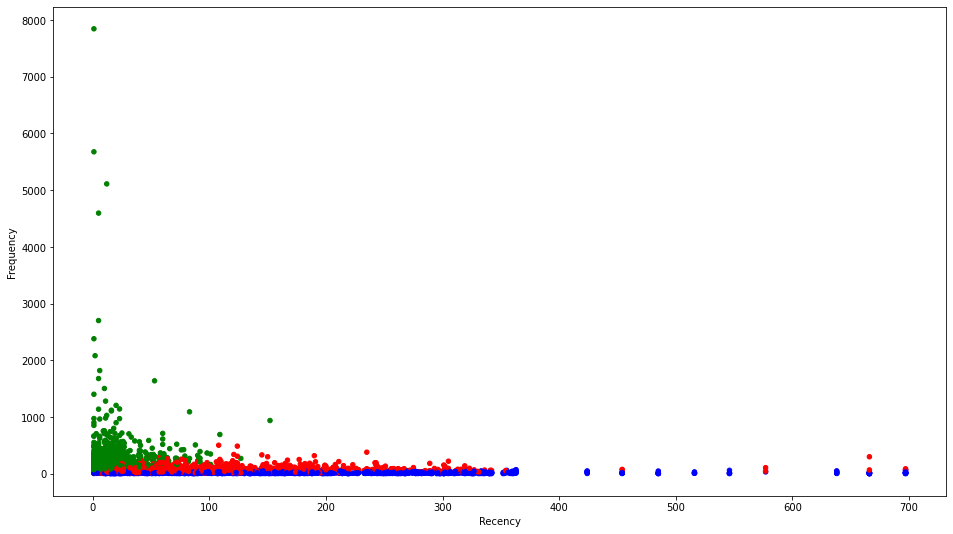

In [ ]:
colors_set = [ "blue", "red","green"]

RFM['Cluster_color_RF'] = RFM['Cluster'].map(lambda p: colors_set[p])

segmentation_graph= RFM.plot(
    kind="scatter", 
    x="Recency", y="Frequency",
    figsize=(16,9),
    c= RFM['Cluster_color_RF'] ,
    legend=True,
)

#setting maximum limits to R and F values so as to better visualize the concentrated data
#plt.xlim(xmax=400)
#plt.ylim(ymax=4000)

**Plotting Segmentation graph**

Scatter Plot: **Frequency Vs Monetary**

We map colors to the segmented data points to highlight the clusters in the scatter plot

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


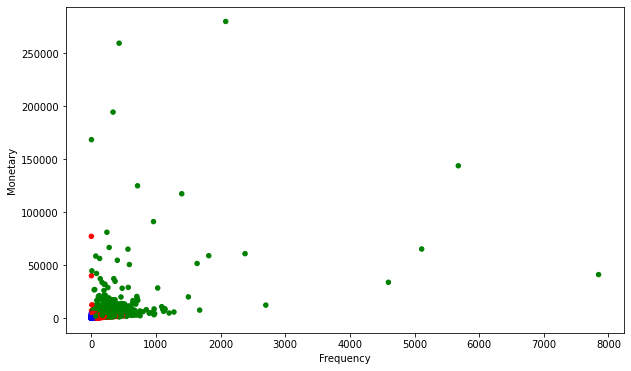

In [ ]:
colors_set = [ "blue", "red","green"]

RFM['Cluster_color_FM'] = RFM['Cluster'].map(lambda p: colors_set[p])

segmentation_graph= RFM.plot(    
    kind="scatter", 
    x="Frequency", y="Monetary",
    figsize=(10,6),
    c= RFM['Cluster_color_FM'] ,
    legend=True,
)

#setting maximum limits to F and M values so as to better visualize the concentrated data
#plt.xlim(xmax=3000)
#plt.ylim(ymax=200000)

**Plotting Segmentation graph**

Scatter Plot: **Recency Vs Monetary**

We map colors to the segmented data points to highlight the clusters in the scatter plot

(-14009.251000000002, 200000.0)

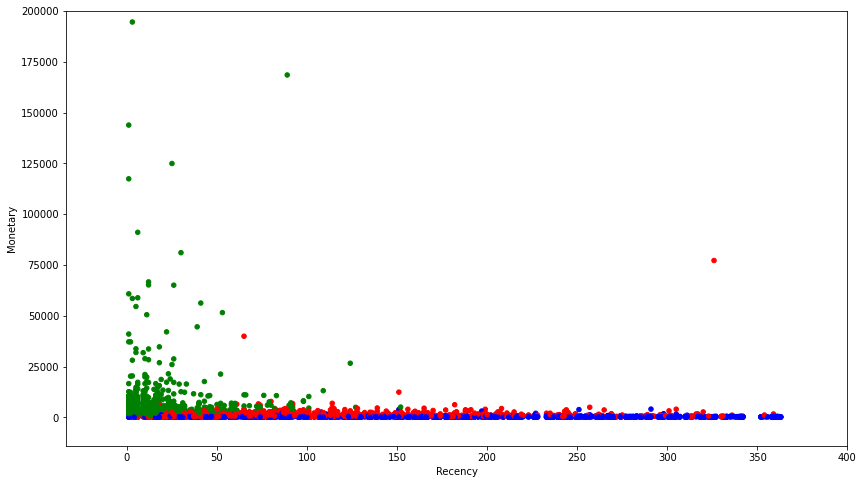

In [ ]:
colors_set = [ "blue", "red","green"]

RFM['Cluster_color_RM'] = RFM['Cluster'].map(lambda p: colors_set[p])

segmentation_graph= RFM.plot(    
    kind="scatter", 
    x="Recency", y="Monetary",
    figsize=(14,8),
    c= RFM['Cluster_color_RM'] ,
    legend=True,
)

#setting maximum limits to R and M values so as to better visualize the concentrated data
#plt.xlim(xmax=400)
#plt.ylim(ymax=200000)

In [ ]:
RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Combine,Loyalty_Level,Cluster,Cluster_color_RF,Cluster_color_FM,Cluster_color_RM
CustomerID,,,,,,,,,,,,
12346.0,326,1,77183.60,4,4,1,9,Silver,1,red,red,red
12347.0,40,182,4310.00,2,1,1,4,Gold,2,green,green,green
12348.0,76,31,1797.24,3,3,1,7,Silver,1,red,red,red
12349.0,19,73,1757.55,1,2,1,4,Gold,2,green,green,green
12350.0,311,17,334.40,4,4,3,11,Bronze,0,blue,blue,blue


# **Trying k Means clustering in 3D using all the three R,F,M features together**
 

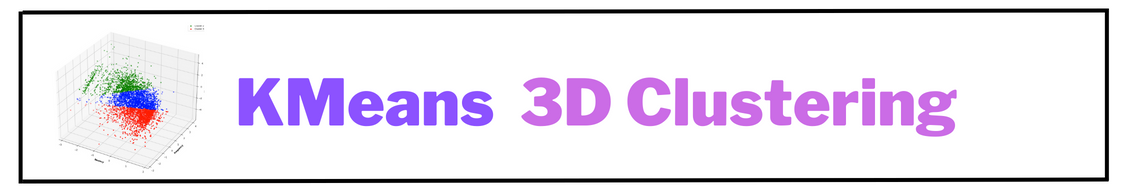

It would be more realistic and holistic to combinedly segment customers using all the three important features(RFM) as all the features are significant for business analysis of customers 

In [ ]:
Scaled_Data.head()
#Scaled_Data stores the scaled and transformed RFM dataframe

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,1.318122,-2.772924,3.688795
12347.0,-0.191608,1.149331,1.407382
12348.0,0.270378,-0.184718,0.715446
12349.0,-0.727714,0.460449,0.698049
12350.0,1.284300,-0.637692,-0.614653


Capturing the required three feature(s) from the Log_Data dataframe into a variable **Features_RFM**

In [ ]:
Features_RFM=Scaled_Data

The empty space before first semicolon indicates ‘all rows must be considered’. Also, ‘0:4’ indicates extract columns from index 0 to index 3, 4 excluded(index starts from 0).

**Finding out the optimum number of clusters using ‘Elbow Method’.**

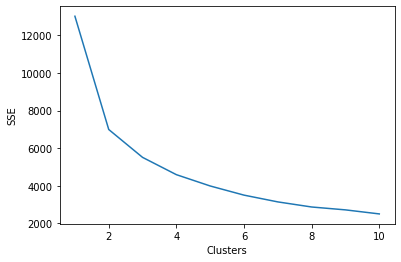

In [ ]:
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i,init='k-means++',n_init='auto', random_state=40)
    k_means.fit(Features_RFM)
    wcss.append(k_means.inertia_)
#plot elbow curve
plt.plot(np.arange(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

From the elbow curve, it is evident that the optimum number of clusters i.e., n_clusters is **3**.

In [ ]:
KMean_3D_cluster = KMeans(n_clusters= 3, init= 'k-means++',n_init='auto', max_iter= 1000)
KMean_3D_cluster.fit_predict(Features_RFM)

array([1, 2, 1, ..., 0, 2, 2], dtype=int32)

**Finding the clusters and labelling them**

 We get the labels for each data point using the labels_ attribute

In [ ]:
Features_RFM['Cluster_3D'] = KMean_3D_cluster.labels_
Features_RFM.head()

,Recency,Frequency,Monetary,Cluster_3D
CustomerID,,,,
12346.0,1.318122,-2.772924,3.688795,1
12347.0,-0.191608,1.149331,1.407382,2
12348.0,0.270378,-0.184718,0.715446,1
12349.0,-0.727714,0.460449,0.698049,2
12350.0,1.284300,-0.637692,-0.614653,0


**Plotting the above segmentation in 3D**

Separating the data table into three. One containing data with cluster 0 and other containing data with clusters 1 and 2

In [ ]:
#cluster data 0
cd0 = Features_RFM[Features_RFM.Cluster_3D==0]

#cluster data 1
cd1 = Features_RFM[Features_RFM.Cluster_3D==1]

#cluster data 2
cd2 = Features_RFM[Features_RFM.Cluster_3D==2]

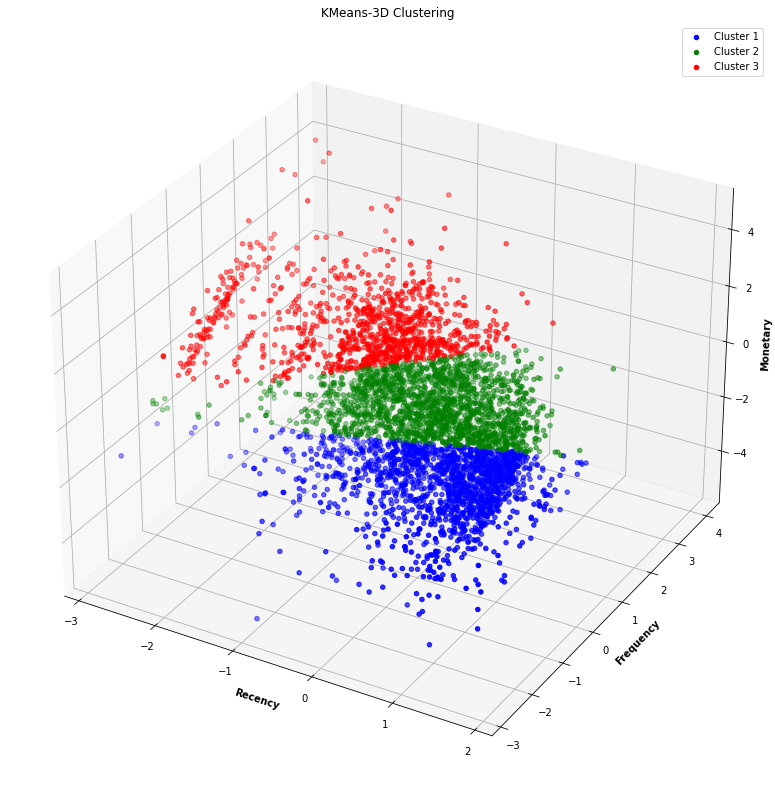

In [ ]:
#Figure and axes preparation
fig = plt.figure(figsize = (18, 14))
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 5, 100)
yline = np.linspace(0, 5, 100)
zline = np.linspace(0, 5, 100)

#Scatter plots with coloured labels
kplot.scatter3D(cd0.Recency, cd0.Frequency, cd0.Monetary, c='blue', label = 'Cluster 1')
kplot.scatter3D(cd1.Recency,cd1.Frequency,cd1.Monetary,c ='green', label = 'Cluster 2')
kplot.scatter3D(cd2.Recency,cd2.Frequency,cd2.Monetary,c ='red', label = 'Cluster 3')

#Nomenclature
plt.legend()
plt.title("KMeans-3D Clustering")
kplot.set_xlabel('Recency', fontweight ='bold')
kplot.set_ylabel('Frequency', fontweight ='bold')
kplot.set_zlabel('Monetary', fontweight ='bold')
plt.show()

**3D Segmentation: Observation & Analysis**

It can be observed that,

Cluster 3 represents high Monetary,high Frequency and low recency customers;*most loyal customers*

Cluster 1 represents lower Monetary,lower Frequency and higher recency customers;*least loyal customers*

While Cluster 2 represents an intermediate loyalty level between the cluster 3 and cluster 1

**Evaluation of the Clusters**

Using‘Silhouette score’ metric to evaluate the quality of clusters created in terms of how well samples are clustered with other samples that are similar to each other. 

The higher the score, the better the algorithm.

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(Features_RFM,Features_RFM['Cluster_3D'])
print(score)

0.38393079942805747


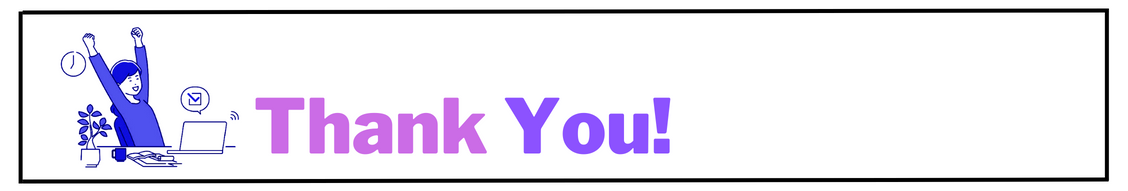